## Classify Urban area USing Landsat8 in three classes : Building, Green area, Street 

In [1]:
from datetime import date
today = date.today()
d2 = today.strftime("%B %d, %Y")
print("Updated by Masoumeh Hashemi, ", d2) 

Updated by Masoumeh Hashemi,  April 29, 2023


***ATENTION:*** before running this lab, upgrade geemap, please go to File, New, Terminal, and pass the following command:

In [2]:
!pip install eemont

     |████████████████████████████████| 134 kB 4.3 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 224 kB 35.5 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 119 kB 52.4 MB/s            
     |████████████████████████████████| 40 kB 2.1 MB/s             
  Created wheel for eemont: filename=eemont-0.3.6-py3-none-any.whl size=135762 sha256=a2510437c0b5d04eea9c10f81887628ab05d3adf2ef963f6911483ac08f61589
  Stored in directory: /home/jovyan/.cache/pip/wheels/a8/10/2b/43cf7b375206608eadcb9ac6edf7b2fb4b4851b4befd963fe4
  Created wheel for ee-extra: filename=ee_extra-0.0.15-py3-none-any.whl size=236772 sha256=4c5aac287bc020d89407a0e04dcc0b5ca0efe35c1b80d49f405586efb3878281
  Stored in directory: /home/jovyan/.cache/pip/wheels/66/66/06/98d6dee3f612d84d2b487fc73ca2c2479279dc2714faddcc10
Successfully built eemont ee-extra
  Attempting uninstall: ee-extra
    Found existing installation: ee-extra

## Adding another basemap to the map 
 Using https://github.com/giswqs/geemap/blob/master/geemap/basemaps.py   
 

In [3]:
import ee, eemont
ee.Initialize()
## here NAIP imagry is added as basemap 
import geemap
Map = geemap.Map()
Map.add_basemap("USGS NAIP Imagery")
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

##### Import all basemap in case users are able to pick up based on their goal 

In [4]:
m=geemap.Map()
m.basemap_demo()
m

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

### Importing Area of Interest 


 Let's find Logan, UT coordinates using the https://www.latlong.net/ website

In [5]:

logan_shp ="logan.shp"
logan_shp 
logan = geemap.shp_to_ee(logan_shp )
Map.addLayer(logan, {'fill_color':'red', 'outline': 2}, name='logan')

### Define the landsat data and consider some parameters for visualization
https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C02_T1_L2

In [6]:
point = ee.Geometry.Point([-111.845630,41.678746])


landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
    .filterBounds(point) \
    .filterDate('2021-05-01', '2021-07-31') \
    .sort('CLOUD_COVER') \
    .first() \
 

landsat = landsat.select('SR_B.').multiply(0.0000275).add(-0.2)



## Cliping the image using a shapefile

In [7]:
# upload the shapefile in the folder
point = ee.Geometry.Point([-111.845630,41.678746])
logan_shp ="logan.shp"
logan_shp 
logan = geemap.shp_to_ee(logan_shp )

landsat = landsat.clip(logan)


### Adding the landsat imagry to the map and diplay it with false color

In [9]:
Map.addLayer(landsat, {'bands': ['SR_B3', 'SR_B2', 'SR_B1'],'min': 0.0, 'max': 0.3}, name='Fals Color LnadSat 8 ')
Map

Map(bottom=650.0, center=[-54.79415254138296, 186.42514305746892], controls=(WidgetControl(options=['position'…

#### The list of available indices in eemont can be retrieved by running (check this list to get details on the implemented indexes https://eemont.readthedocs.io/en/latest/guide/spectralIndices.html):

In [10]:
import eemont

eemont.listIndices()

['AFRI1600',
 'AFRI2100',
 'ANDWI',
 'ARI',
 'ARI2',
 'ARVI',
 'ATSAVI',
 'AVI',
 'AWEInsh',
 'AWEIsh',
 'BAI',
 'BAIM',
 'BAIS2',
 'BCC',
 'BI',
 'BITM',
 'BIXS',
 'BLFEI',
 'BNDVI',
 'BRBA',
 'BWDRVI',
 'BaI',
 'CIG',
 'CIRE',
 'CSI',
 'CSIT',
 'CVI',
 'DBI',
 'DBSI',
 'DPDD',
 'DSI',
 'DSWI1',
 'DSWI2',
 'DSWI3',
 'DSWI4',
 'DSWI5',
 'DVI',
 'DVIplus',
 'DpRVIHH',
 'DpRVIVV',
 'EBBI',
 'EMBI',
 'EVI',
 'EVI2',
 'ExG',
 'ExGR',
 'ExR',
 'FCVI',
 'GARI',
 'GBNDVI',
 'GCC',
 'GDVI',
 'GEMI',
 'GLI',
 'GM1',
 'GM2',
 'GNDVI',
 'GOSAVI',
 'GRNDVI',
 'GRVI',
 'GSAVI',
 'GVMI',
 'IAVI',
 'IBI',
 'IKAW',
 'IPVI',
 'IRECI',
 'LSWI',
 'MBI',
 'MBWI',
 'MCARI',
 'MCARI1',
 'MCARI2',
 'MCARI705',
 'MCARIOSAVI',
 'MCARIOSAVI705',
 'MGRVI',
 'MIRBI',
 'MLSWI26',
 'MLSWI27',
 'MNDVI',
 'MNDWI',
 'MNLI',
 'MRBVI',
 'MSAVI',
 'MSI',
 'MSR',
 'MSR705',
 'MTCI',
 'MTVI1',
 'MTVI2',
 'MuWIR',
 'NBAI',
 'NBLI',
 'NBR',
 'NBR2',
 'NBRSWIR',
 'NBRT1',
 'NBRT2',
 'NBRT3',
 'NBRplus',
 'NBSIMS',
 'NBUI',
 '

In [11]:
# landsat = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
#     .filterBounds(point) \
#     .filterDate('2021-05-01', '2021-07-31') \
#     .sort('CLOUD_COVER') \
#     .first() 
#landsati=landsat.spectralIndices('vegetation')
landsati=landsat

In [12]:
landsati.bandNames().getInfo()


['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B6', 'SR_B7']

Define areas that have unique characteristics: bare soil, water, vegetation

We can use NDVI for help in diferentiating these areas:

## calculate NDVI

In [13]:
img_name ='ndvi'
ndvi=landsat.normalizedDifference(['SR_B5', 'SR_B4'])
landsat =landsat.addBands(ndvi)

vis_params = {
  'min': -0.2,
  'max': 1.0,
  'palette': ['blue','white','brown','yellow', 'lime', 'green','navy']}

#Map.addLayer(ndvi,vis_params,img_name)

colors = vis_params['palette']
vmin = vis_params['min']  
vmax = vis_params['max']

#Map.add_colorbar_branca(colors=colors, vmin=vmin, vmax=vmax, layer_name=img_name)

#Map

### Make training dataset

There are several ways you can create a region for generating the training dataset.

- Draw a shape (e.g., rectangle) on the map and the use `region = Map.user_roi`
- Define a geometry, such as `region = ee.Geometry.Rectangle([-122.6003, 37.4831, -121.8036, 37.8288])`
- Create a buffer zone around a point, such as `region = ee.Geometry.Point([-122.4439, 37.7538]).buffer(10000)`
- If you don't define a region, it will use the image footprint by default

In [14]:
# FOR Street ;
#REC1
poly = ee.Geometry.Rectangle([-111.832846, 41.760899, -111.831617, 41.760070])

# // Create a Feature from the Geometry.
streetl= ee.Feature(poly, {'class': 2, 'name': 'street'});
#Map.addLayer(streetl, {'fill_color':'yellow', 'outline': 1}, name='streetl')

#REC2
poly = ee.Geometry.Rectangle([-111.831689,41.7402207, -111.830956, 41.739764])

# // Create a Feature from the Geometry.
street2 = ee.Feature(poly , {'class': 2, 'name': 'street'});
#Map.addLayer(street2, {'fill_color':'yellow', 'outline': 1}, name='street2')
#REC3
poly = ee.Geometry.Rectangle([-111.837205,41.734306, -111.836638,41.7338021])

# // Create a Feature from the Geometry.
street3 = ee.Feature(poly, {'class': 2, 'name': 'street'});
#Map.addLayer(street3, {'fill_color':'yellow', 'outline': 1}, name='street3')
#Map

In [15]:
# FOR VEGETATION

#Rec1
poly= ee.Geometry.Rectangle([-111.830666,41.749691,-111.829679, 41.749211])
vegetationl = ee.Feature(poly, {'class': 1, 'name': 'vegetation'});
#Map.addLayer(vegetationl , {'fill_color':'green', 'outline': 1}, name='vegetationl')

#Rec2
poly= ee.Geometry.Rectangle([-111.836743,41.747952,-111.836078, 41.746976])

# // Create a Feature from the Geometry.
vegetation2 = ee.Feature(poly, {'class': 1, 'name': 'vegetation'});
#Map.addLayer(vegetation2, {'fill_color':'green', 'outline': 1}, name='vegetation2')
#Rec3
poly = ee.Geometry.Rectangle([-111.848104,41.755461,-111.846472,41.754757])
# // Create a Feature from the Geometry.
vegetation3 = ee.Feature(poly, {'class': 1, 'name': 'vegetation'});
#Map.addLayer(vegetation3, {'fill_color':'green', 'outline': 1}, name='vegetation3')

Map

Map(bottom=650.0, center=[-54.79415254138296, 186.42514305746892], controls=(WidgetControl(options=['position'…

In [16]:
# FOR Building

# // Create a Feature from the Geometry.
#Rec1
poly = ee.Geometry.Rectangle([-111.812329,41.747856, -111.811556, 41.747296])
Buildingl = ee.Feature(poly, {'class':0, 'name': 'Building'});
#Map.addLayer(Buildingl, {'fill_color':'gray', 'outline': 1}, name='Buildingl')

#Rec2
poly= ee.Geometry.Rectangle([-111.816211,41.754724, -111.815780, 41.754031])

# // Create a Feature from the Geometry.
Building2 = ee.Feature(poly, {'class': 0, 'name': 'Building'});
#Map.addLayer(Building2, {'fill_color':'gray', 'outline': 1}, name='Building2')
#Rec3
poly= ee.Geometry.Rectangle([-111.821893,41.756152,-111.821936, 41.755607])

#// Create a Feature from the Geometry.
Building3 = ee.Feature(poly, {'class': 0, 'name': 'Building'});
#Map.addLayer(Building3, {'fill_color':'gray', 'outline': 1}, name='Building3')
# #Rec4
# poly= ee.Geometry.Rectangle([-111.829867,41.741429,-111.829738, 41.755607])

# #// Create a Feature from the Geometry.
# Building4 = ee.Feature(poly, {'class': 0, 'name': 'Building'});
# Map.addLayer(Building4, {'fill_color':'gray', 'outline': 1}, name='Building3')
# #Rec5
# poly= ee.Geometry.Rectangle([-111.832302,41.743863,-111.832195, 41.743786])

# #// Create a Feature from the Geometry.
# Building5 = ee.Feature(poly, {'class': 0, 'name': 'Building'});
# Map.addLayer(Building5, {'fill_color':'gray', 'outline': 1}, name='Building3')
# # Map
# # water = ee.Feature(polygon, {'class': 0, 'name': 'water'});
# # Map.addLayer(water, {'fill_color':'blue', 'outline': 1}, name='water')
Map

Map(bottom=650.0, center=[-54.79415254138296, 186.42514305746892], controls=(WidgetControl(options=['position'…

Merge Features into a Feature Collection

In [17]:
trainingFeatures = ee.FeatureCollection([Buildingl,Building2,Building3,vegetationl, vegetation2, vegetation3, streetl, street2, street3 ])


## Input( peridctors)

In [18]:
predictionBands = ['SR_B2', 'SR_B3', 'SR_B4', 'SR_B5' ,'SR_B6','SR_B7']

In the merged FeatureCollection, each Feature should have a property called 'class' where the classes are consecutive integers, one for each class, starting at 0. Verify that this is true.

In [19]:
print(trainingFeatures.first().getInfo())

{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-111.812329, 41.747296], [-111.811556, 41.747296], [-111.811556, 41.747856], [-111.812329, 41.747856], [-111.812329, 41.747296]]]}, 'id': '0', 'properties': {'class': 0, 'name': 'Building'}}


In [20]:
info = landsati.getInfo()
print(info)

{'type': 'Image', 'bands': [{'id': 'SR_B1', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -0.2, 'max': 1.6022125}, 'dimensions': [7791, 7911], 'crs': 'EPSG:32612', 'crs_transform': [30, 0, 340785, 0, -30, 4741515]}, {'id': 'SR_B2', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -0.2, 'max': 1.6022125}, 'dimensions': [7791, 7911], 'crs': 'EPSG:32612', 'crs_transform': [30, 0, 340785, 0, -30, 4741515]}, {'id': 'SR_B3', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -0.2, 'max': 1.6022125}, 'dimensions': [7791, 7911], 'crs': 'EPSG:32612', 'crs_transform': [30, 0, 340785, 0, -30, 4741515]}, {'id': 'SR_B4', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -0.2, 'max': 1.6022125}, 'dimensions': [7791, 7911], 'crs': 'EPSG:32612', 'crs_transform': [30, 0, 340785, 0, -30, 4741515]}, {'id': 'SR_B5', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -0.2, 'max': 1.6022125}, 'dimensions': [7791, 7911], 'crs': 'EP

  Create a training set T for the classifier by sampling the Landsat composite with the merged features:

## creat traing set from the  Image based on the ploygones and class feature 

In [22]:
classifierTraining = landsati.select(predictionBands).sampleRegions(
      collection= trainingFeatures, 
      properties= ['class'], 
      scale= 30
    );

guid for randomColumn(

https://developers.google.com/earth-engine/apidocs/ee-imagecollection-randomcolumn

In [23]:
# // Randomly split the data into 60% for training, and 40% for testing
trainingTesting = classifierTraining.randomColumn('random',111009);

training = trainingTesting.filter(ee.Filter.lt('random', 0.66));

testing = trainingTesting.filter(ee.Filter.gte('random', 0.66));

### - Non-linear regression functions

There is a pletora of options for classification in Google Earth Engine. Here is an screenshot of these options:

In [24]:
# ![](https://i.imgur.com/vROsEiq.png)
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.imgur.com/vROsEiq.png")#, width=100, height=100)

### Classification and Regression Tree (CART)

In [25]:
#hyperparameter to tune
leaf_val=4

cartclassifier = ee.Classifier.smileCart(minLeafPopulation=leaf_val).train(
      features= training, 
      classProperty= 'class', 
      inputProperties= predictionBands
    );

- Make predictions over the input imagery (classify in this context is a misnomer):


In [26]:
cartClasifficationImage = landsati.select(predictionBands).classify(cartclassifier);

Map.addLayer(cartClasifficationImage, {'min': 0, 'max': 2,
                                   'palette':['gray','green', 'yellow']},'CART classification');
Map

Map(bottom=650.0, center=[-54.79415254138296, 186.42514305746892], controls=(WidgetControl(options=['position'…

### Random Forest classifier

In [27]:
# hyperparameter to tune
trees_val=13

rfClassification = ee.Classifier.smileRandomForest(numberOfTrees=trees_val, seed=111009).train(
      features= training, 
      classProperty= 'class', 
      inputProperties= predictionBands
    )

In [28]:
# // Perform the RF regression on the landsat image
rfClassificationImage = landsati.select(predictionBands).classify(rfClassification);
    
# // Visualize the RF regression
Map.addLayer(rfClassificationImage,  {'min': 0, 'max': 2,
                                   'palette':['gray','green', 'yellow']}, 'RF classification');

Map

Map(bottom=650.0, center=[-54.79415254138296, 186.42514305746892], controls=(WidgetControl(options=['position'…

### Support Vector Machines

In [29]:
# hyperparameter to tune
gamma_val =0.1

# // Create an SVM classifier with custom parameters.
svClassification = ee.Classifier.libsvm(svmType='C_SVC',kernelType='RBF',gamma=gamma_val).train(
      features= training, 
      classProperty= 'class', 
      inputProperties= predictionBands
    )

In the classification context, accuracy measurements are often derived from a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).

### Accuracy Assessment

Print the confusion matrix and expand the object to inspect the matrix.  The entries represent number of pixels.  Items on the diagonal represent correct classification.  Items off the diagonal are misclassifications, where the class in row i is classified as column j.  It's also possible to get basic descriptive statistics from the confusion matrix.  For example:

### What is a confusion matrix?

A confusion matrix is used here to compare two different data, one the true value and the other the predicted values. We will be using it primarily to compute overall accuracy between the model and the different machine learning results, but confusion matrices also provide explicit information about which  classes were classified incorrectly; not just if pixels were classified incorrectly, but what class they were incorrectly classified as. For an example of how to use and interpret a confusion matrix for LULC remote sensing visit https://www.harrisgeospatial.com/docs/CalculatingConfusionMatrices.html and 
http://gsp.humboldt.edu/olm_2019/courses/GSP_216_Online/lesson6-2/metrics.html

In [30]:
# // Perform the CART classification on the test set

test=testing.classify(cartclassifier)

# print(test.first().getInfo())
# // Get a confusion matrix representing expected accuracy.
testAccuracy = test.errorMatrix('class', 'classification');

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# cm_display.plot()
# plt.show()

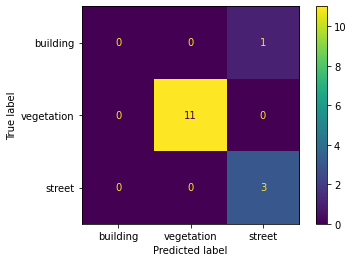

In [31]:
import numpy as np
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
errormaxtrix=np.array(testAccuracy.array().getInfo())
cm_display = ConfusionMatrixDisplay(confusion_matrix = errormaxtrix, display_labels = ["building", "vegetation","street"])

cm_display.plot()
plt.show()



In [32]:
print(testAccuracy.name());
print(errormaxtrix)
print('Overall Accuracy:', testAccuracy.accuracy().getInfo());
print('Producers Accuracy:', testAccuracy.producersAccuracy().getInfo());
print('Consumers Accuracy:', testAccuracy.consumersAccuracy().getInfo());
print('Kappa:', testAccuracy.kappa().getInfo());


ConfusionMatrix
[[ 0  0  1]
 [ 0 11  0]
 [ 0  0  3]]
Overall Accuracy: 0.9333333333333333
Producers Accuracy: [[0], [1], [1]]
Consumers Accuracy: [[0, 1, 0.75]]
Kappa: 0.8369565217391305


ConfusionMatrix
[[ 1  0  0]
 [ 0 11  0]
 [ 1  0  2]]
Overall Accuracy: 0.9333333333333333
Producers Accuracy: [[1], [1], [0.6666666666666666]]
Consumers Accuracy: [[0.5, 1, 1]]
Kappa: 0.84375


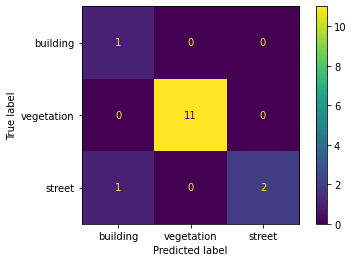

In [33]:
# // Perform the RF classification on the test set

test=testing.classify(rfClassification)
# print(test.first().getInfo())
# // Get a confusion matrix representing expected accuracy.
testAccuracy = test.errorMatrix('class', 'classification');

errormaxtrix=np.array(testAccuracy.array().getInfo())

print(testAccuracy.name());
print(errormaxtrix)
print('Overall Accuracy:', testAccuracy.accuracy().getInfo());
print('Producers Accuracy:', testAccuracy.producersAccuracy().getInfo());
print('Consumers Accuracy:', testAccuracy.consumersAccuracy().getInfo());
print('Kappa:', testAccuracy.kappa().getInfo());
cm_display = ConfusionMatrixDisplay(confusion_matrix = errormaxtrix, display_labels = ["building", "vegetation","street"])

cm_display.plot()
plt.show()


ConfusionMatrix
[[ 0  1  0]
 [ 0 11  0]
 [ 0  3  0]]
Overall Accuracy: 0.7333333333333333
Producers Accuracy: [[0], [1], [0]]
Consumers Accuracy: [[0, 0.7333333333333333, 0]]
Kappa: 0


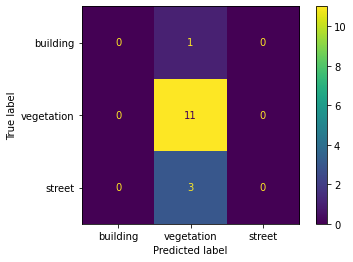

In [34]:
# // Perform the SVR classification on the test set

test=testing.classify(svClassification)
# print(test.first().getInfo())
# // Get a confusion matrix representing expected accuracy.
testAccuracy = test.errorMatrix('class', 'classification');

errormaxtrix=np.array(testAccuracy.array().getInfo())

print(testAccuracy.name());
print(errormaxtrix)
print('Overall Accuracy:', testAccuracy.accuracy().getInfo());
print('Producers Accuracy:', testAccuracy.producersAccuracy().getInfo());
print('Consumers Accuracy:', testAccuracy.consumersAccuracy().getInfo());
print('Kappa:', testAccuracy.kappa().getInfo());

errormaxtrix=np.array(testAccuracy.array().getInfo())
cm_display = ConfusionMatrixDisplay(confusion_matrix = errormaxtrix, display_labels = ["building", "vegetation","street"])

cm_display.plot()
plt.show()


### BONUS: Hyperparameters tuning



### RF

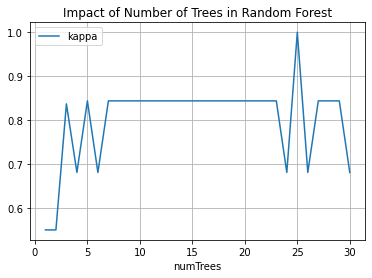

In [35]:
numTrees = ee.List.sequence(1, 30, 1)


def trees(t):
    rfclass = ee.Classifier.smileRandomForest(numberOfTrees=t, seed=111009).train(
    features= training, 
    classProperty= 'class', 
    inputProperties= predictionBands)
    
    rfTesting = testing.classify(rfclass)
    testAccuracy = rfTesting.errorMatrix('class', 'classification');
    kappa= testAccuracy.kappa();       
    return kappa


kappa_trees=numTrees.map(trees)
value_info = kappa_trees.getInfo()

# print(rmse_trees.getInfo())

import pandas as pd
df =pd.DataFrame(value_info,columns=['kappa'])
df['numTrees'] = numTrees.getInfo() 

ax =df.plot.line(x='numTrees', 
             y='kappa',
             title= 'Impact of Number of Trees in Random Forest'
             )
ax.grid()

### svc

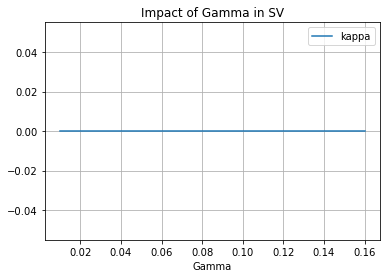

In [36]:
gamma_vals = ee.List.sequence(0.01, 0.2, 0.05)


def gammas(t):
    svclass = ee.Classifier.libsvm(svmType='C_SVC',kernelType='RBF',gamma=t).train(
      features= training, 
      classProperty= 'class', 
      inputProperties= predictionBands
    )
    
    svTesting = testing.classify(svclass)
    testAccuracy = svTesting.errorMatrix('class', 'classification');
    kappa= testAccuracy.kappa();       
    return kappa


kappa_gama=gamma_vals.map(gammas)
value_info = kappa_gama.getInfo()

# print(rmse_gama.getInfo())

import pandas as pd
df =pd.DataFrame(value_info,columns=['kappa'])
df['Gamma'] = gamma_vals.getInfo() 

ax =df.plot.line(x='Gamma', 
             y='kappa',
             title= 'Impact of Gamma in SV'
             )
ax.grid()

### CART

In [ ]:
leaf_vals = ee.List.sequence(1, 20, 1)


def leaves(t):
    cartclass= ee.Classifier.smileCart(minLeafPopulation=t).train(
      features= training, 
      classProperty= 'class', 
      inputProperties= predictionBands
    )
    
    cartTesting = testing.classify(cartclass)
    testAccuracy = cartTesting.errorMatrix('class', 'classification');
    kappa= testAccuracy.kappa();       
    return kappa


kappa_leaf=leaf_vals.map(leaves)
value_info = kappa_leaf.getInfo()

# print(rmse_gama.getInfo())

import pandas as pd
df =pd.DataFrame(value_info,columns=['kappa'])
df['leaf'] = leaf_vals.getInfo() 

ax =df.plot.line(x='leaf', 
             y='kappa',
             title= 'Impact of minLeafPopulation in cart'
             )
ax.grid()